In [82]:
import pandas as pd
import os
import numpy as np
import os
import sys
sys.path.append(os.path.abspath(".."))
from pathlib import Path
from dateutil.parser import parse
import seaborn as sns
import matplotlib.pyplot as plt 
from pivottablejs import pivot_ui
from google.cloud import bigquery
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [83]:
pd.set_option('display.max_columns', None) # or other number has no effect
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
data_path = '../data/pred/data.csv'

In [85]:
data = pd.read_csv(data_path)

In [86]:
def plot_actual_vs_predicted(df, county, category_name):
    # Ensure date_week is in datetime format
    df["date_week"] = pd.to_datetime(df["date_week"])

    # Filter by county and category
    df_filtered = df[(df["county"] == county) & (df["category_name"] == category_name)]

    # Split actual and predicted data
    df_actual = df_filtered[df_filtered["is_predict"] == False]
    print(df_actual.head(3))
    df_predicted = df_filtered[df_filtered["is_predict"] == True]
    print(df_predicted.head(3))

    # Plot actual vs. predicted sales
    plt.figure(figsize=(12, 6))
    plt.plot(df_actual["date_week"], df_actual["bottles_sold"], marker='o', label="Actual Sales")
    plt.plot(df_predicted["date_week"], df_predicted["bottles_sold"], marker='o', linestyle="dashed", label="Predicted Sales")

    # Formatting
    plt.xlabel("Date")
    plt.ylabel("Bottles Sold")
    plt.ylim(bottom=0)
    plt.title(f"Actual vs Predicted Sales for {category_name} in {county}")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    date_week      county   category_name  bottles_sold  is_predict
4  2024-01-07  BLACK HAWK  TEQUILA_MEZCAL         265.0       False
46 2024-01-14  BLACK HAWK  TEQUILA_MEZCAL         137.0       False
88 2024-01-21  BLACK HAWK  TEQUILA_MEZCAL         131.0       False
      date_week      county   category_name  bottles_sold  is_predict
2232 2025-01-05  BLACK HAWK  TEQUILA_MEZCAL    407.670258        True
2233 2025-01-12  BLACK HAWK  TEQUILA_MEZCAL    412.762817        True
2234 2025-01-19  BLACK HAWK  TEQUILA_MEZCAL    402.446960        True


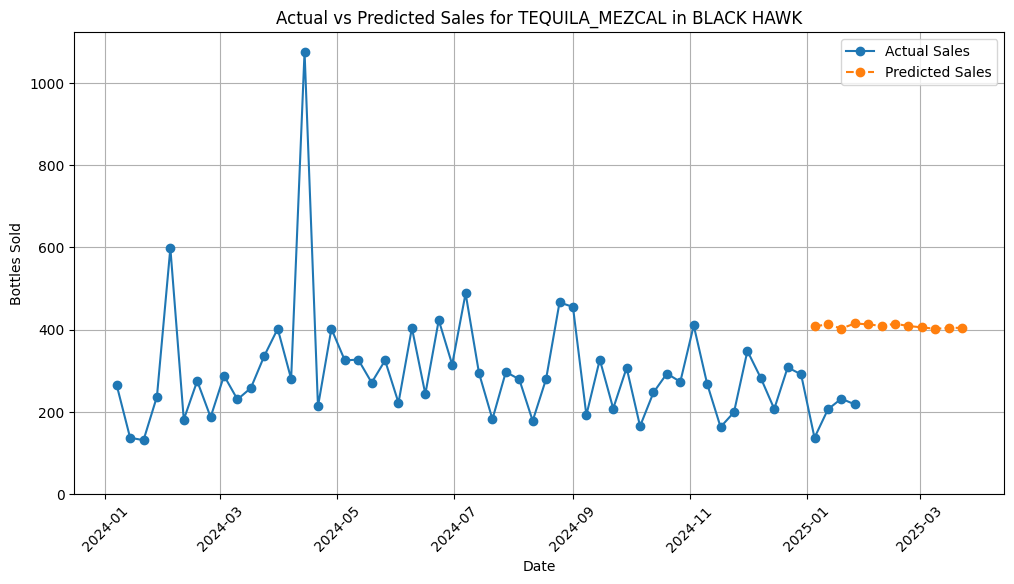

In [87]:
plot_actual_vs_predicted(data, 'BLACK HAWK', 'TEQUILA_MEZCAL')

     date_week county category_name  bottles_sold  is_predict
31  2024-01-07   POLK           RUM        1152.0       False
73  2024-01-14   POLK           RUM        1335.0       False
115 2024-01-21   POLK           RUM        1142.0       False
      date_week county category_name  bottles_sold  is_predict
2556 2025-01-05   POLK           RUM    407.670349        True
2557 2025-01-12   POLK           RUM    412.762909        True
2558 2025-01-19   POLK           RUM    402.446960        True


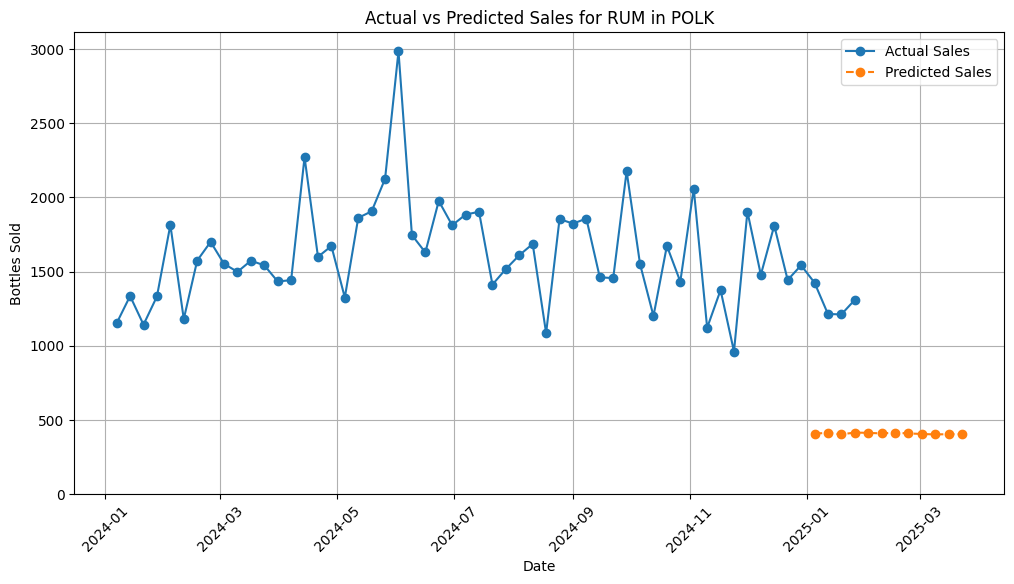

In [88]:
plot_actual_vs_predicted(data, 'POLK', 'RUM')

      date_week county category_name  bottles_sold  is_predict
1612 2024-01-07   POLK           RUM        1152.0       False
1613 2024-01-14   POLK           RUM        1335.0       False
1614 2024-01-21   POLK           RUM        1142.0       False
      date_week county category_name  bottles_sold  is_predict
2556 2025-01-05   POLK           RUM    335.106079        True
2557 2025-01-12   POLK           RUM    318.553284        True
2558 2025-01-19   POLK           RUM    339.722382        True


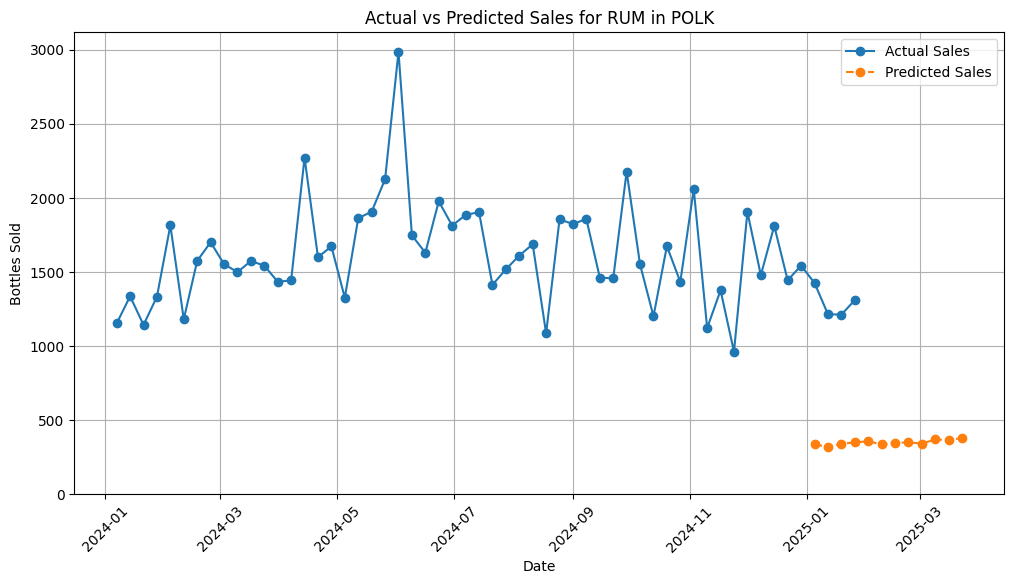

In [17]:
plot_actual_vs_predicted(data, 'POLK', 'RUM')

In [24]:
data_proc_path = '../data/processed/data_processed.csv'
data_proc = pd.read_csv(data_proc_path)

In [25]:
data_proc.head()

,cat_preproc__county_OTHER,cat_preproc__category_name_OTROS,num_preproc__week_year,num_preproc__week_of_year,num_preproc__bottles_sold,remainder__date_week,remainder__sin_MoSold,remainder__cos_MoSold,category_name,county,sin_MoSold,cos_MoSold,bottles_sold
0,1.0,1.0,-1.166667,0.981132,-1.507427,2012-12-30,-2.449294e-16,1.000000,OTROS,OTHER,-2.449294e-16,1.000000,7597
1,1.0,1.0,-1.000000,-0.981132,-0.764252,2013-01-06,5.000000e-01,0.866025,OTROS,OTHER,5.000000e-01,0.866025,12075
2,1.0,1.0,-1.000000,-0.943396,-0.748154,2013-01-13,5.000000e-01,0.866025,OTROS,OTHER,5.000000e-01,0.866025,12172
3,1.0,1.0,-1.000000,-0.905660,-0.617874,2013-01-20,5.000000e-01,0.866025,OTROS,OTHER,5.000000e-01,0.866025,12957
4,1.0,1.0,-1.000000,-0.867925,-0.596963,2013-01-27,5.000000e-01,0.866025,OTROS,OTHER,5.000000e-01,0.866025,13083
